In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sc
import math

In [3]:
## Setting max displayed rows to 500, in order to display the full output of any command 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv("train.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(by='date')

df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

country
Canada    Axes(0.125,0.11;0.775x0.77)
Kenya     Axes(0.125,0.11;0.775x0.77)
Name: product, dtype: object

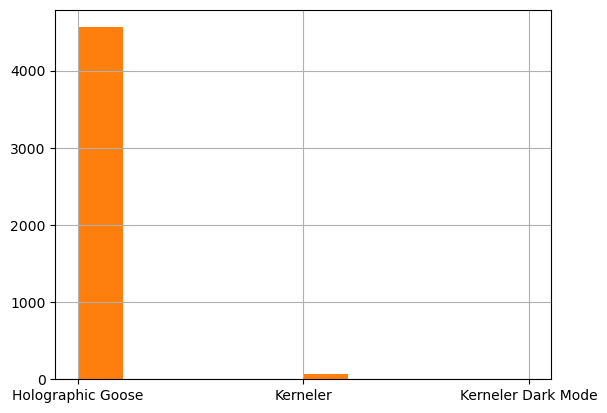

In [5]:
missing = df.loc[df["num_sold"].isna()]
missing.groupby("country")["product"].hist()

In [7]:
def toType(dtype):
    if pd.api.types.is_bool_dtype(dtype):
        return "Categorical"
    elif pd.api.types.is_numeric_dtype(dtype):
        return "Numeric"
    else:
        return "Categorical"
        

def indep_missingness(df, target, predictor):
    predictor_type = toType(df[predictor])

    if predictor_type == "Categorical":
        #First build a contingency table
        table = pd.crosstab(df[target].isna(), df[predictor])
        res = sc.chi2_contingency(table)
        print(f'p-value of the chi-square test: {res.pvalue}')
        return res.pvalue
    else:
        mask = df[target].isna()
        stat_less, p_less = sc.mannwhitneyu(df.loc[mask, predictor], df.loc[~mask, predictor], alternative = "less")
        stat_greater, p_greater = sc.mannwhitneyu(df.loc[mask, predictor], df.loc[~mask, predictor], alternative = "greater")
        stat_two_sided, p_two_sided = sc.mannwhitneyu(df.loc[mask, predictor], df.loc[~mask, predictor], alternative = "two-sided")
        print(f'p-value less: {p_less}')
        print(f'p-value greater: {p_greater}')
        print(f'p-value two-sided: {p_two_sided}')
        return min(p_less, p_grater, p_two_sided)

indep_missingness(df, "num_sold", "country")
indep_missingness(df, "num_sold", "store")
indep_missingness(df, "num_sold", "product")

p-value of the chi-square test: 0.0
p-value of the chi-square test: 0.0
p-value of the chi-square test: 0.0


0.0

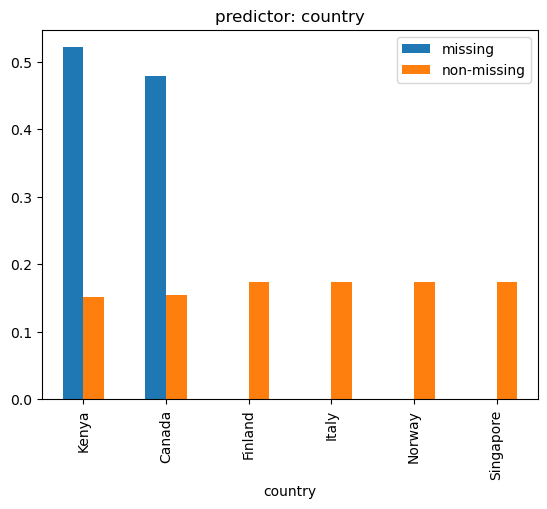

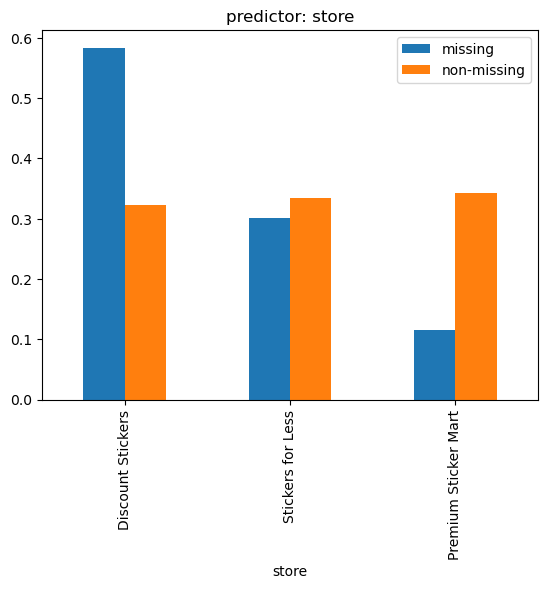

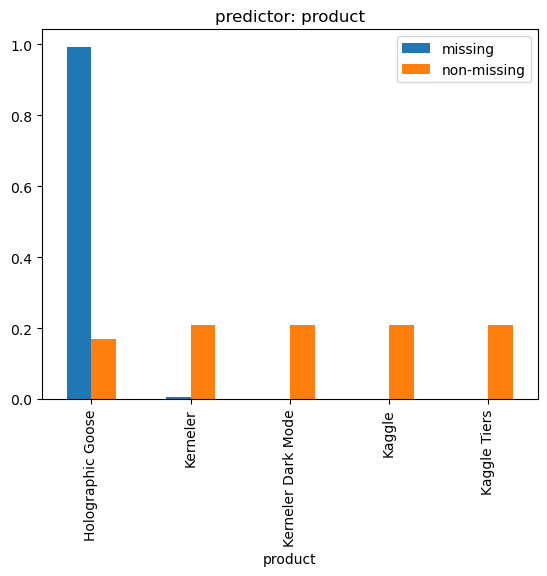

In [69]:
# If the feature we want to use for imputation is categorical as well: CHI-SQUARE TEST OF INDEPENDENCE

target = "num_sold"

predictors = ["country", "store", "product"]

for predictor in predictors:
    # First plot the histograms
    missing = df.loc[ df[target].isna(), predictor].value_counts(normalize = True)
    non_missing = df.loc[~df[target].isna(), predictor].value_counts(normalize = True)
    pd.concat(
        [missing, non_missing],
        axis = 1,
        keys = ["missing", "non-missing"]
    ).plot(kind = "bar")
    plt.title(f"predictor: {predictor}")
    plt.legend()
    plt.show()



Holographic Goose
Kaggle
Kaggle Tiers
Kerneler
Kerneler Dark Mode


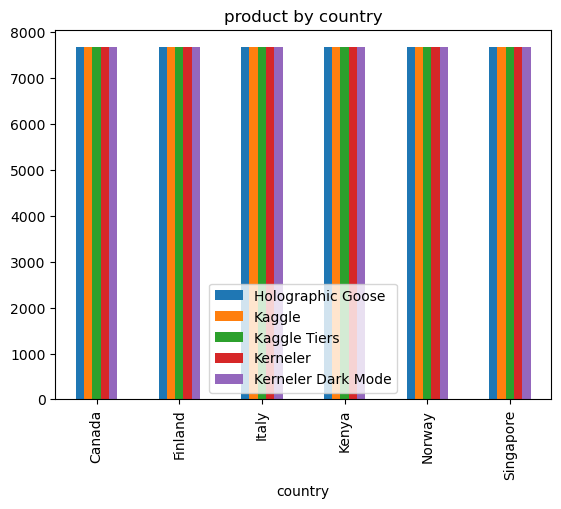

Discount Stickers
Stickers for Less
Premium Sticker Mart


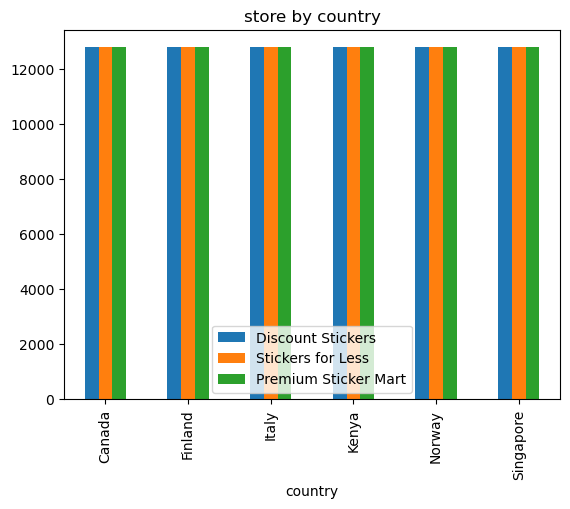

Holographic Goose
Kaggle
Kaggle Tiers
Kerneler
Kerneler Dark Mode


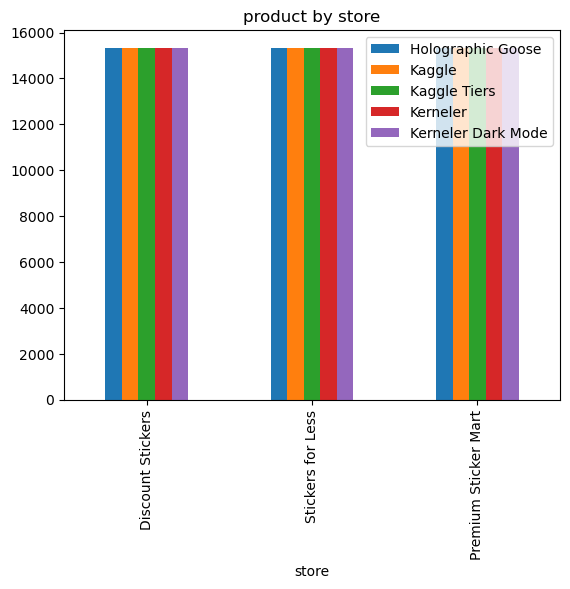

In [107]:
target = "product"

predictor = "country"
targets = df[target].unique()

# First plot the histograms
d = {}
for p in targets:
    
    s = df.loc[df[target] == p, predictor].value_counts(normalize = False)
    print(p)
    d[p] = s
    
pd.concat(
    [d[p] for p in targets],
    axis = 1,
    keys = [p for p in targets]
).plot(kind = "bar")
plt.title(f"product by country")
plt.legend()
plt.show()


target = "store"

predictor = "country"
targets = df[target].unique()

# First plot the histograms
d = {}
for p in targets:
    
    s = df.loc[df[target] == p, predictor].value_counts(normalize = False)
    print(p)
    d[p] = s
    
pd.concat(
    [d[p] for p in targets],
    axis = 1,
    keys = [p for p in targets]
).plot(kind = "bar")
plt.title(f"store by country")
plt.legend()
plt.show()


target = "product"
targets = df[target].unique()
predictor = "store"

d = {}
for p in targets:
    s = df.loc[df[target] == p, predictor].value_counts(normalize = False)
    print(p)
    d[p] = s
    
pd.concat(
    [d[p] for p in targets],
    axis = 1,
    keys = [p for p in targets]
).plot(kind = "bar")
plt.title(f"product by store")
plt.legend()
plt.show()


In [71]:
df["product"].unique()

array(['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler',
       'Kerneler Dark Mode'], dtype=object)

Holographic Goose
Kaggle
Kaggle Tiers
Kerneler
Kerneler Dark Mode


<Axes: xlabel='country'>

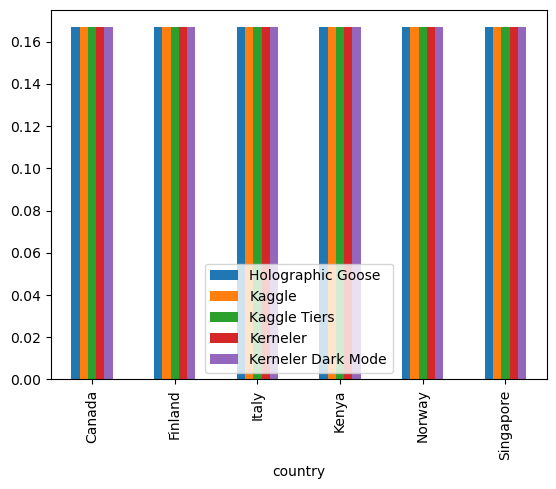

In [87]:
target = "product"

predictor = "country"
products = df[target].unique()

# First plot the histograms
d = {}
for p in products:
    
    s = df.loc[df[target] == p, predictor].value_counts(normalize = True)
    print(p)
    d[p] = s

pd.concat(
        [d[p] for p in products],
        axis = 1,
        keys = [p for p in products]
    ).plot(kind = "bar")

Holographic Goose
Kerneler
Kerneler Dark Mode


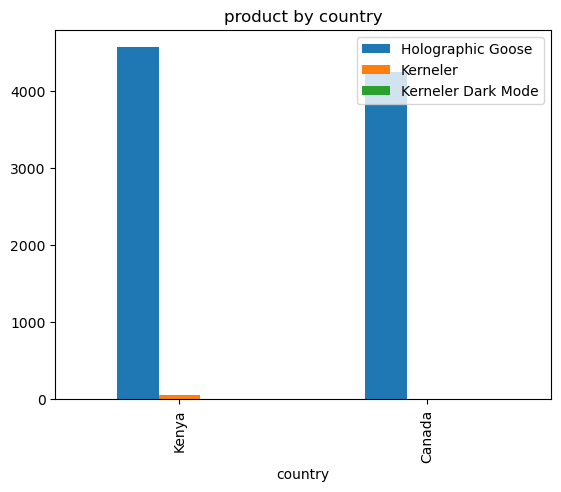

Discount Stickers
Stickers for Less
Premium Sticker Mart


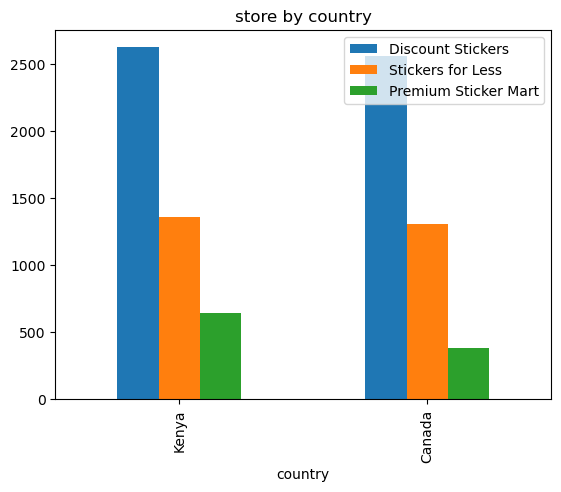

Holographic Goose
Kerneler
Kerneler Dark Mode


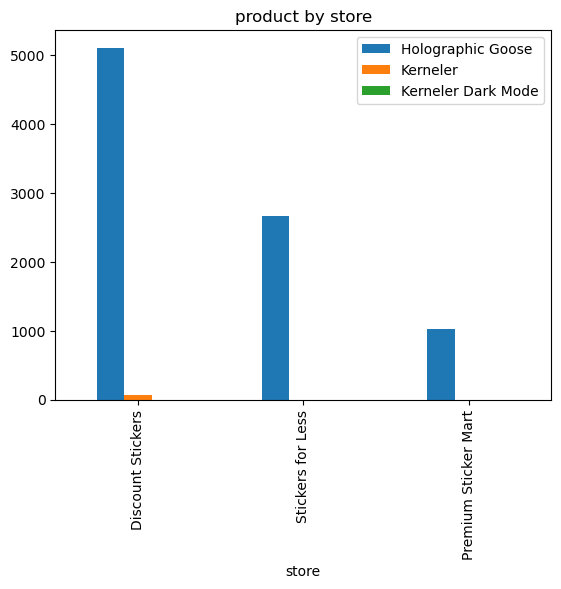

In [123]:
target = "product"

predictor = "country"
targets = missing[target].unique()

# First plot the histograms
d = {}
for p in targets:
    
    s = missing.loc[missing[target] == p, predictor].value_counts(normalize = False)
    print(p)
    d[p] = s
    
pd.concat(
    [d[p] for p in targets],
    axis = 1,
    keys = [p for p in targets]
).plot(kind = "bar")
plt.title(f"product by country")
plt.legend()
plt.show()


target = "store"

predictor = "country"
targets = missing[target].unique()

# First plot the histograms
d = {}
for p in targets:
    
    s = missing.loc[missing[target] == p, predictor].value_counts(normalize = False)
    print(p)
    d[p] = s
    
pd.concat(
    [d[p] for p in targets],
    axis = 1,
    keys = [p for p in targets]
).plot(kind = "bar")
plt.title(f"store by country")
plt.legend()
plt.show()


target = "product"
targets = missing[target].unique()
predictor = "store"

d = {}
for p in targets:
    s = missing.loc[missing[target] == p, predictor].value_counts(normalize = False)
    print(p)
    d[p] = s
    
pd.concat(
    [d[p] for p in targets],
    axis = 1,
    keys = [p for p in targets]
).plot(kind = "bar")
plt.title(f"product by store")
plt.legend()
plt.show()



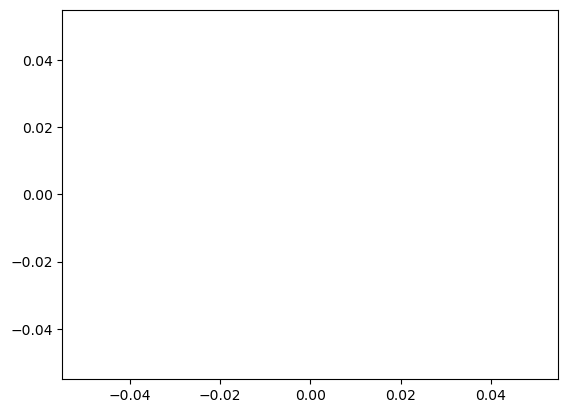

In [198]:
plt.plot(df.loc[((df["product"] == "Holographic Goose") & (df["store"] == "Discount Stickers")) & (df["country"] == "Canada"), "num_sold"])

In [202]:
(~df.loc[((df["product"] == "Holographic Goose") & (df["store"] == "Discount Stickers")) & (df["country"] == "Canada")].isna()).any()

id           True
date         True
country      True
store        True
product      True
num_sold    False
dtype: bool

There are 8871 NA values.

In [217]:
len(df) - len(df.dropna())

8871

The following cell shows that Holographic Goose is missing (likely zero) in all Discount Stickers in Canada (2557 values)

In [221]:
df.loc[((df["product"] == "Holographic Goose") & (df["store"] == "Discount Stickers")) & (df["country"] == "Canada")].dropna()
print(f"That accounts for {len(df.loc[((df["product"] == "Holographic Goose") & (df["store"] == "Discount Stickers")) & (df["country"] == "Canada")])} values")

That accounts for 2557 values


In [270]:
countries = ["Canada", "Kenya"]
stores = df["store"].unique()
product = ["Holographic Goose", "Kerneler", "Kerneler Dark Mode"]

all_NAs = []
some_NAs = []
for c in countries:
    for s in stores:
        for p in product:
            if df.loc[(df["country"] == c) & (df["store"] == s) & (df["product"] == p), "num_sold"].isna().all():
                all_NAs.append((c,s,p))
            elif df.loc[(df["country"] == c) & (df["store"] == s) & (df["product"] == p), "num_sold"].isna().any():
                some_NAs.append((c,s,p))
            
print(all_NAs)
print(some_NAs)

 

[('Canada', 'Discount Stickers', 'Holographic Goose'), ('Kenya', 'Discount Stickers', 'Holographic Goose')]
[('Canada', 'Discount Stickers', 'Kerneler'), ('Canada', 'Stickers for Less', 'Holographic Goose'), ('Canada', 'Premium Sticker Mart', 'Holographic Goose'), ('Kenya', 'Discount Stickers', 'Kerneler'), ('Kenya', 'Discount Stickers', 'Kerneler Dark Mode'), ('Kenya', 'Stickers for Less', 'Holographic Goose'), ('Kenya', 'Premium Sticker Mart', 'Holographic Goose')]


[('Canada', 'Discount Stickers', 'Holographic Goose'),
 ('Kenya', 'Discount Stickers', 'Holographic Goose')]

In [254]:
df["store"].unique()

array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

In [238]:
df.loc[df["country"] == "Singapore"].dropna()

,id,date,country,store,product,num_sold
89,89,2010-01-01,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1255.0
88,88,2010-01-01,Singapore,Premium Sticker Mart,Kerneler,1045.0
87,87,2010-01-01,Singapore,Premium Sticker Mart,Kaggle Tiers,1992.0
86,86,2010-01-01,Singapore,Premium Sticker Mart,Kaggle,2112.0
85,85,2010-01-01,Singapore,Premium Sticker Mart,Holographic Goose,317.0
...,...,...,...,...,...,...
230116,230116,2016-12-31,Singapore,Discount Stickers,Kaggle,1259.0
230115,230115,2016-12-31,Singapore,Discount Stickers,Holographic Goose,200.0
230117,230117,2016-12-31,Singapore,Discount Stickers,Kaggle Tiers,931.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


### We need to treat separaterly Holographic Goose in Kenya and Canada, and Kerneler in Kenya sold in Discount Sticker stores.

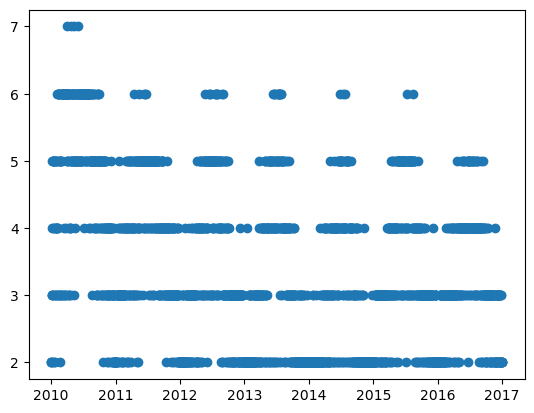

In [143]:
plt.scatter(missing["date"].value_counts().index, missing["date"].value_counts())

In [145]:
df_test = pd.read_csv("test.csv")
df_test["date"] = pd.to_datetime(df_test["date"])
df_test = df_test.sort_values(by='date')

In [147]:
df_test["date"]

0       2017-01-01
65      2017-01-01
64      2017-01-01
63      2017-01-01
62      2017-01-01
           ...    
98485   2019-12-31
98484   2019-12-31
98483   2019-12-31
98480   2019-12-31
98549   2019-12-31
Name: date, Length: 98550, dtype: datetime64[ns]

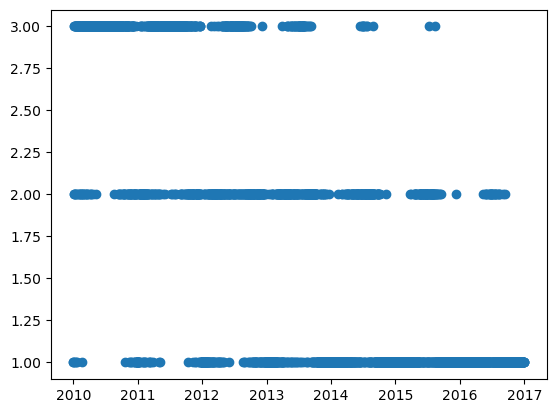

In [159]:
a = missing.loc[(missing["country"] == "Kenya") & (missing["product"] == "Holographic Goose")]
plt.scatter(a["date"].value_counts().index, a["date"].value_counts())

In [167]:
(~df.loc[(df["country"] == "Kenya") & (df["product"] == "Holographic Goose") & (df["store"] == "Discount Stickers"), "num_sold"].isna()).any()

False

In [ ]:
(~df.loc[(df["country"] == "Kenya") & (df["product"] == "Holographic Goose") & (df["store"] == "Discount Stickers"), "num_sold"].isna()).any()

In [169]:
df["store"].unique()

array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

In [171]:
(~df.loc[(df["country"] == "Kenya") & (df["product"] == "Holographic Goose") & (df["store"] == "Stickers for Less"), "num_sold"].isna()).any()

True

In [179]:
df.loc[df["num_sold"] == 0]

,id,date,country,store,product,num_sold


In [ ]:
to_plot = missing.loc[missing["country"] == "Kenya", ]

plt.scatter(missing["date"].value_counts().index, missing["date"].value_counts())

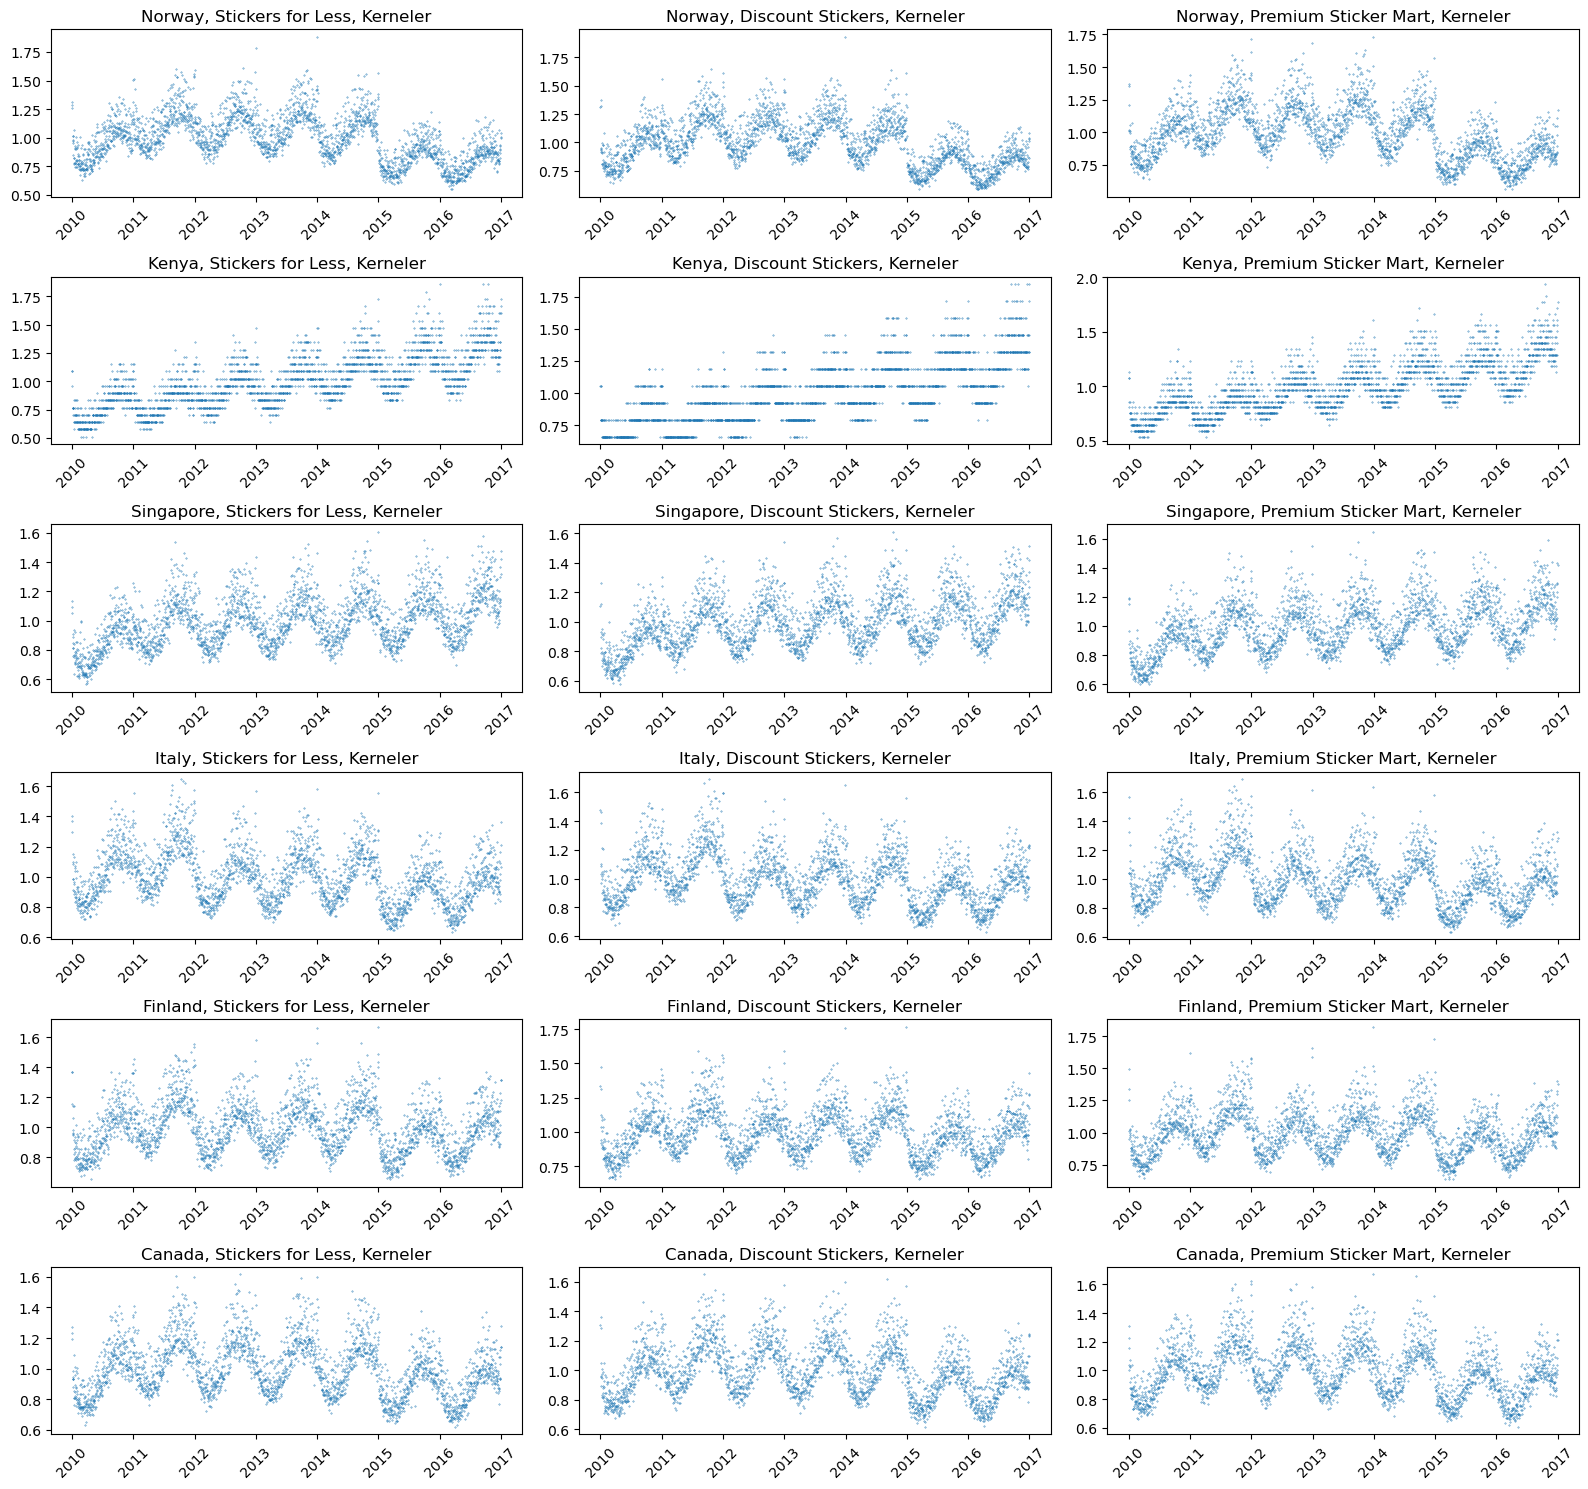

In [520]:
def plot_scatter_grid(df, cols, pred, ncols=3, figsize=(16, 10), intensity = .1):
    n_plots = len(cols)
    nrows = math.ceil(n_plots / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        if len(col) == 3:
            c,s,p = col
            grouped = df.loc[(df["country"] == c) & (df["store"] == s) & (df["product"] == p)]
            t = grouped["date"]
            s_pred = grouped[pred]
            ax.scatter(t, s_pred, s=intensity)
            ax.set_title(f"{c}, {s}, {p}")
            ax.tick_params(axis="x", labelrotation=45)
        elif len(col) == 2:
            c,p = col
            grouped = df.loc[(df["country"] == c) & (df["product"] == p)]
            t = grouped["date"]
            s_pred = grouped[pred]
            ax.scatter(t, s_pred, s=intensity)
            ax.set_title(f"{c}, {p}")
            ax.tick_params(axis="x", labelrotation=45)

    # remove unused axes
    for ax in axes[len(cols):]:
        ax.remove()
    plt.tight_layout()
    plt.show()


countries = df["country"].unique()
#countries = ["Canada"]
stores = df["store"].unique()
#products = df["product"].unique()
products = ["Kerneler"]


cols = [(c,s,p) for c in countries for s in stores for p in products]
plot_scatter_grid(df, cols, "rescaled_sold", figsize=(16, 15))


In [467]:
products = df["product"].unique()
countries = df["country"].unique()
for p in products:
    for c in countries:
        df_pc = df.loc[(df["product"] == p) & (df["country"] == c)]
        time_series_by_store = df_pc.groupby(["store"]).apply(lambda df: df[["date","rescaled_sold"]].resample('W', on = "date").sum(), include_groups = False)
        if "Discount Stickers" in time_series_by_store.index:
            ratio1 = abs(time_series_by_store.loc["Discount Stickers"]/time_series_by_store.loc["Stickers for Less"]-1)
            ratio2 = abs(time_series_by_store.loc["Premium Sticker Mart"]/time_series_by_store.loc["Stickers for Less"]-1)
            max_ratio = ratio1.join(ratio2, rsuffix = '2').max(axis=1).median()
            print(f'{p}, {c}, max relative difference: {max_ratio*100}%')


Holographic Goose, Norway, max relative difference: 2.7427241898051014%
Holographic Goose, Singapore, max relative difference: 2.4797901964840827%
Holographic Goose, Italy, max relative difference: 2.753387601650342%
Holographic Goose, Finland, max relative difference: 2.7043522366339277%
Kerneler Dark Mode, Norway, max relative difference: 2.6111023589398763%
Kerneler Dark Mode, Kenya, max relative difference: 3.0541333500605283%
Kerneler Dark Mode, Singapore, max relative difference: 2.7440408588782104%
Kerneler Dark Mode, Italy, max relative difference: 2.741347820608364%
Kerneler Dark Mode, Finland, max relative difference: 2.6454558607715617%
Kerneler Dark Mode, Canada, max relative difference: 2.697761667391169%
Kerneler, Norway, max relative difference: 2.868679008115227%
Kerneler, Kenya, max relative difference: 3.4157946662516316%
Kerneler, Singapore, max relative difference: 2.6601312380636735%
Kerneler, Italy, max relative difference: 2.8573270714306154%
Kerneler, Finland, m

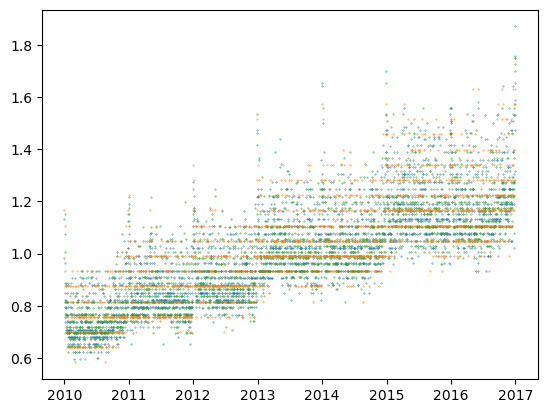

In [463]:
stores = df["store"].unique()
for s in stores:
    grouped = df.loc[(df["country"] == "Kenya") & (df["store"] == s) & (df["product"] == p)]
    t = grouped["date"]
    s_pred = grouped["rescaled_sold"]
    plt.scatter(t, s_pred, s=.1)

# Take-away: we should be able to drop the rows with missing data safely.

In [396]:
p = "Kerneler"
c = "Canada"
df_pc = df.loc[(df["product"] == p) & (df["country"] == c)]
time_series_by_store = df_pc.groupby(["store"]).apply(lambda df: df[["date","rescaled_sold"]].resample('W', on = "date").sum(), include_groups = False)
#df_pc.groupby(["store"]).transform(lambda df: df["rescaled_sold"].rolling('5D', min_periods = 1).sum())

In [ ]:
df["rescaled_sold"] = df.groupby(["country", "store", "product"])["num_sold"].transform(lambda s: s/s.mean())


In [404]:
time_series_by_store

rescaled_sold
store             date                     
Discount Stickers 2010-01-03       3.955475
                  2010-01-10       6.798472
                  2010-01-17       6.010468
                  2010-01-24       6.072272
                  2010-01-31       5.726168
...                                     ...
Stickers for Less 2016-12-04       6.791004
                  2016-12-11       6.664255
                  2016-12-18       6.597062
                  2016-12-25       6.407702
                  2017-01-01       6.554304

[1098 rows x 1 columns]

In [420]:
df["store"].unique()

array(['Stickers for Less', 'Discount Stickers', 'Premium Sticker Mart'],
      dtype=object)

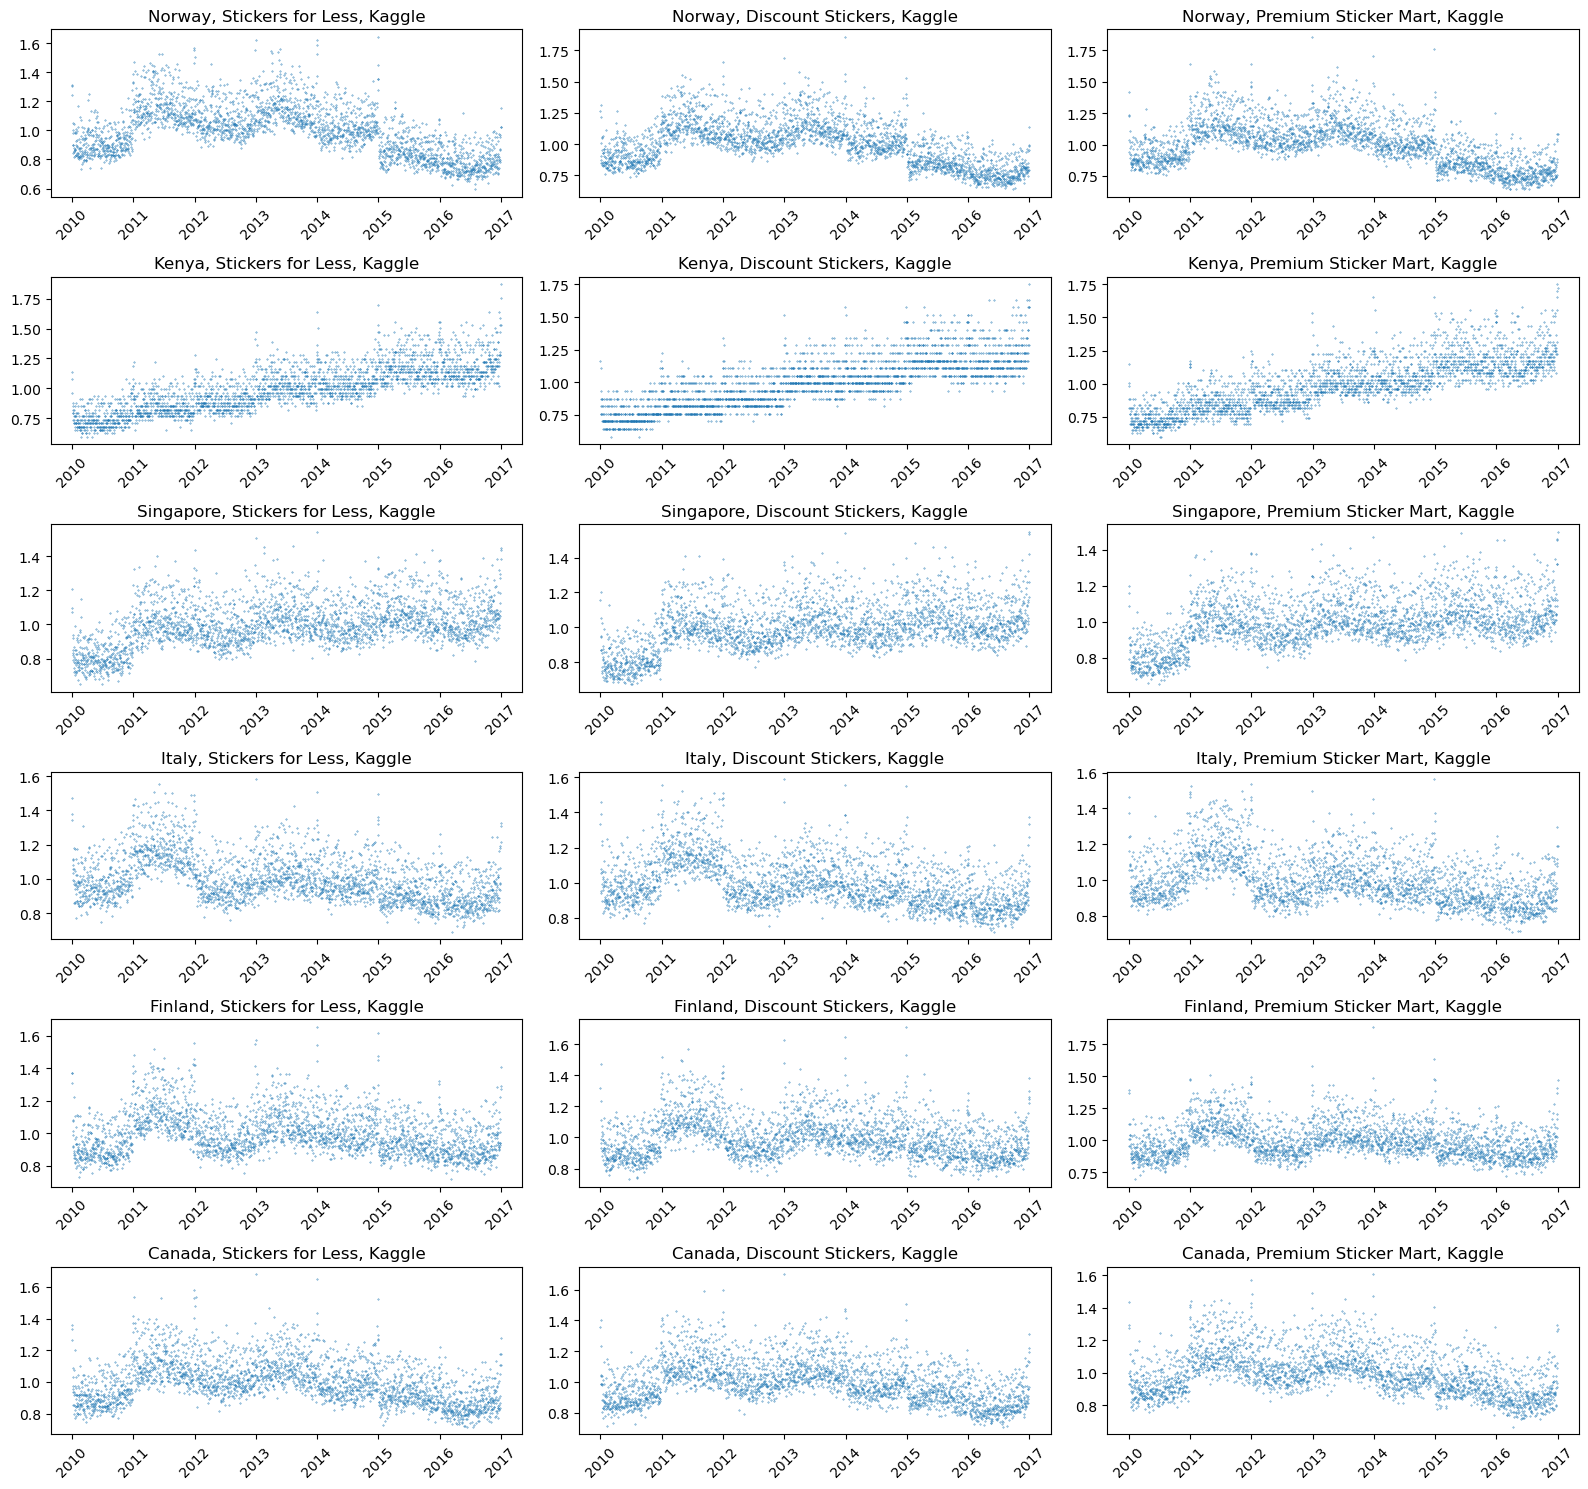

In [350]:
plot_scatter_grid(df, cols, "rescaled_sold", figsize=(16, 15))

### For each product and country, we average over all stores

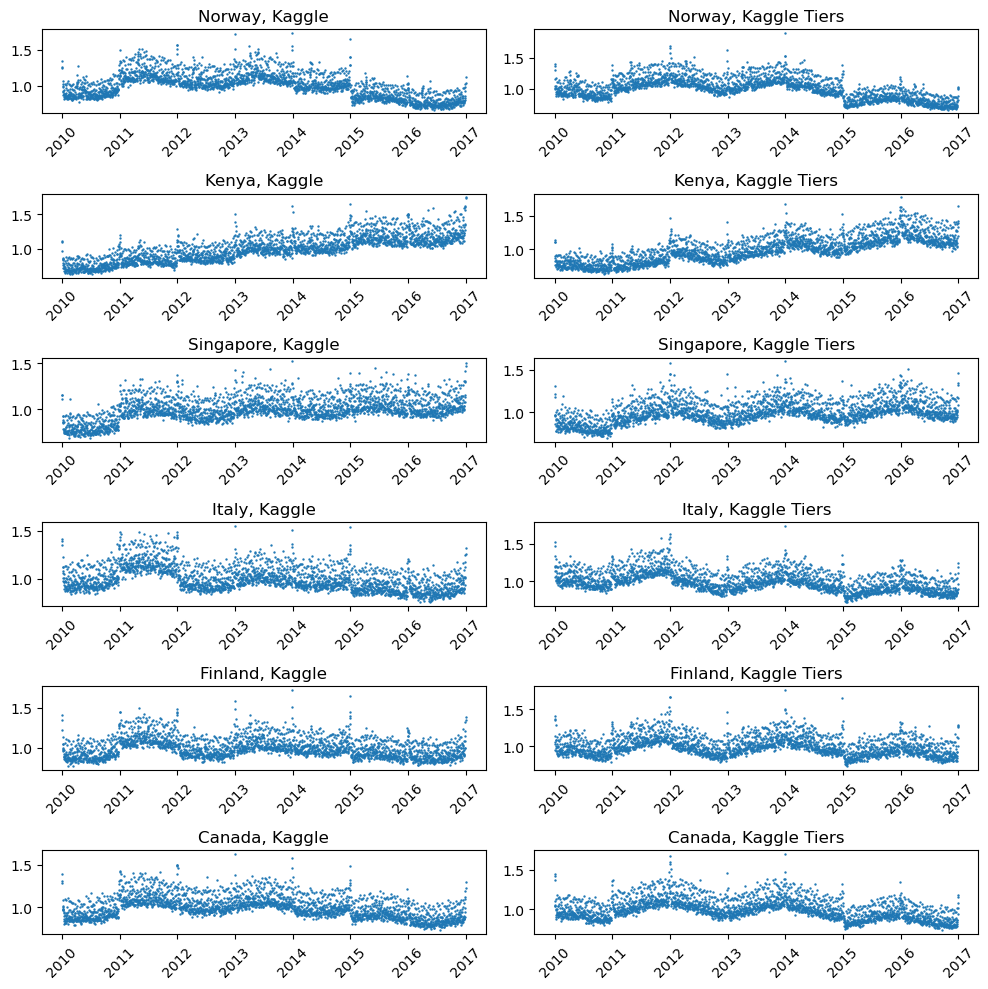

In [548]:
av_over_stores = df.groupby(["country", "product", "date"])["rescaled_sold"].mean().reset_index(level = [0,1,2])

products = ["Kaggle", "Kaggle Tiers"]
countries = df["country"].unique()
cols = [(c,p) for c in countries for p in products] 
plot_scatter_grid(av_over_stores, cols, "rescaled_sold",  ncols = 2, figsize=(10, 10), intensity = .5)


Hypothesis: Kerneler and Kerneler dark mode are in opposition of phase, have the same change points, and are sinusoidal over each period.

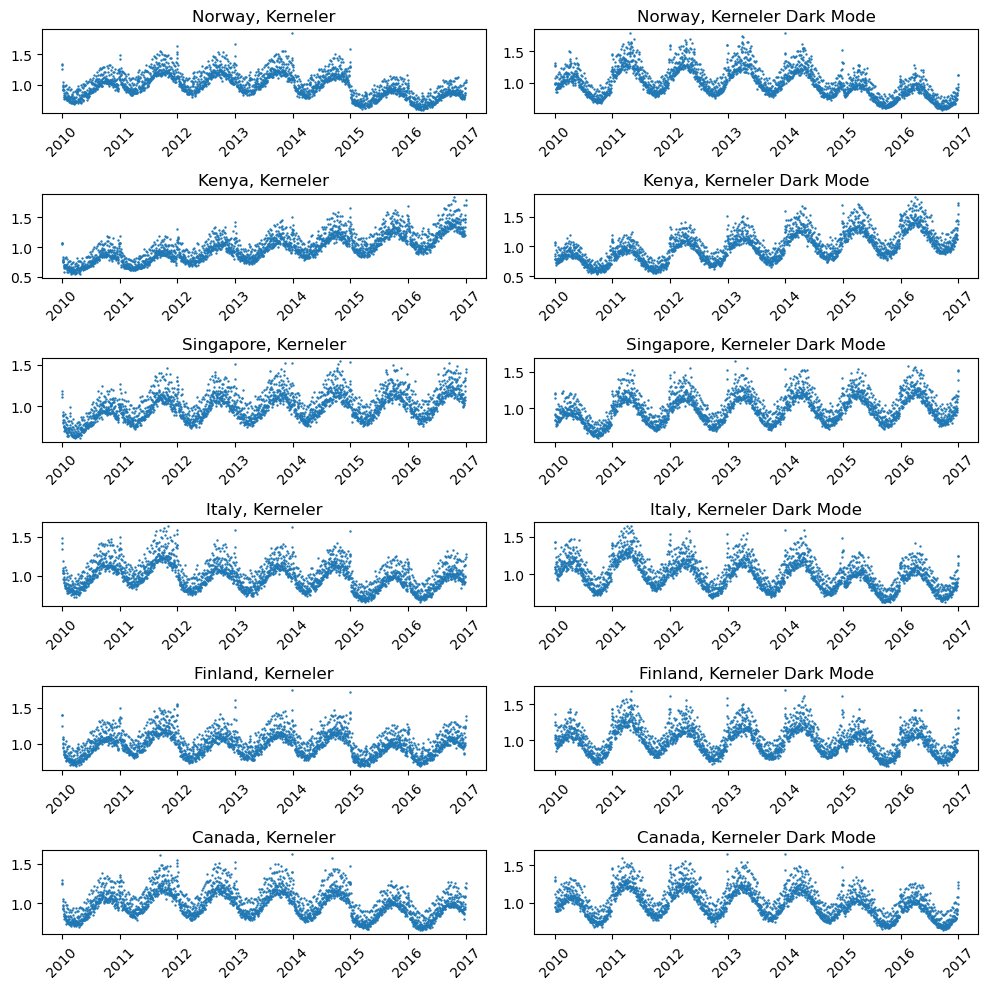

In [550]:
products = ["Kerneler", "Kerneler Dark Mode"]
countries = df["country"].unique()
cols = [(c,p) for c in countries for p in products] 
plot_scatter_grid(av_over_stores, cols, "rescaled_sold",  ncols = 2, figsize=(10, 10), intensity = .5)

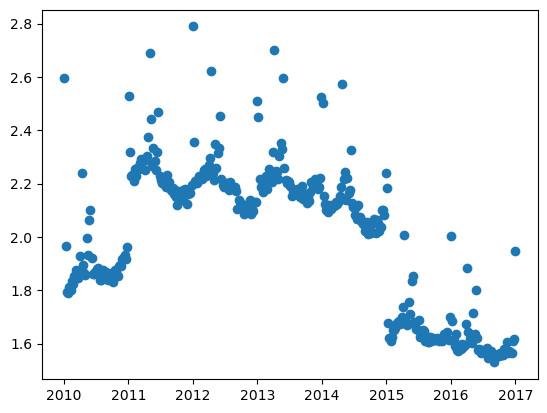

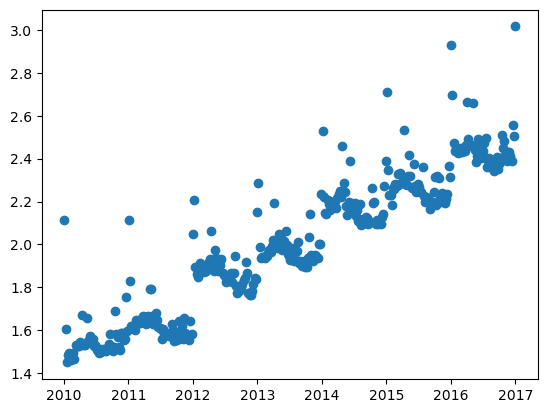

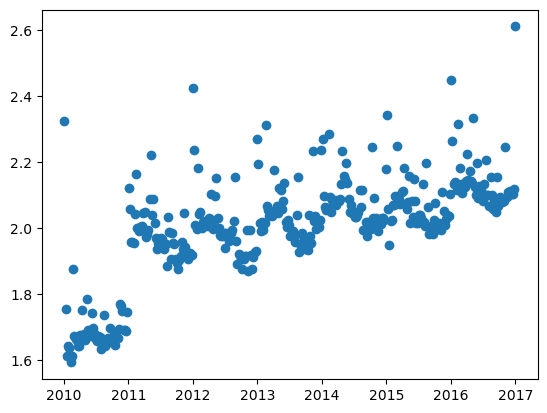

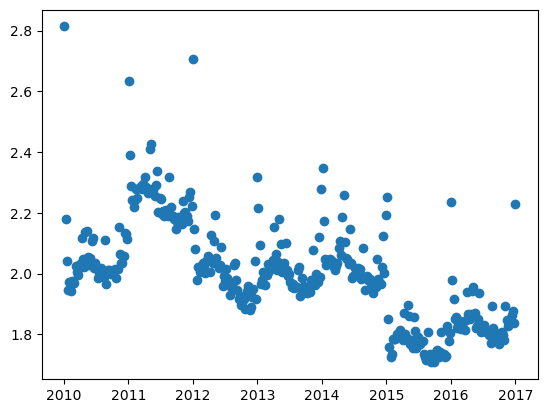

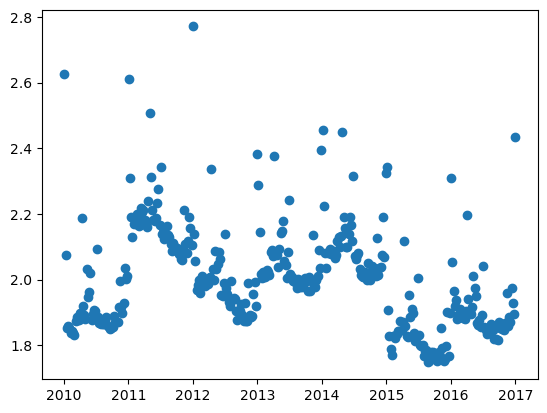

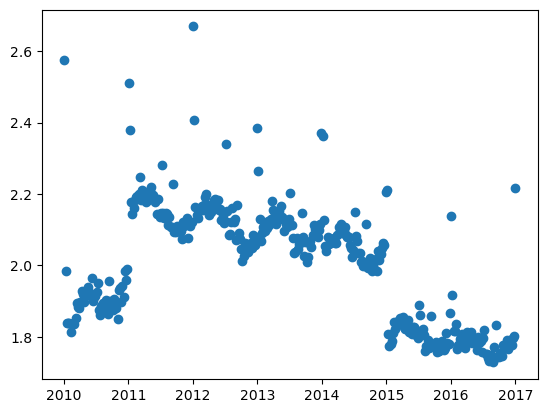

In [576]:
for c in countries:
    av_c = av_over_stores.loc[(av_over_stores["country"] == c) & ((av_over_stores["product"] == "Kerneler") | (av_over_stores["product"] == "Kerneler Dark Mode"))]
    time_series_by_prod = av_c.groupby(["product"]).apply(lambda df: df[["date","rescaled_sold"]].resample('W', on = "date").mean(), include_groups = False)
    sum1 = time_series_by_prod.loc["Kerneler"]+time_series_by_prod.loc["Kerneler Dark Mode"]
    plt.scatter(sum1.index, sum1["rescaled_sold"])
    plt.show()

In [574]:
len(sum1.resample('YE').mean())

8

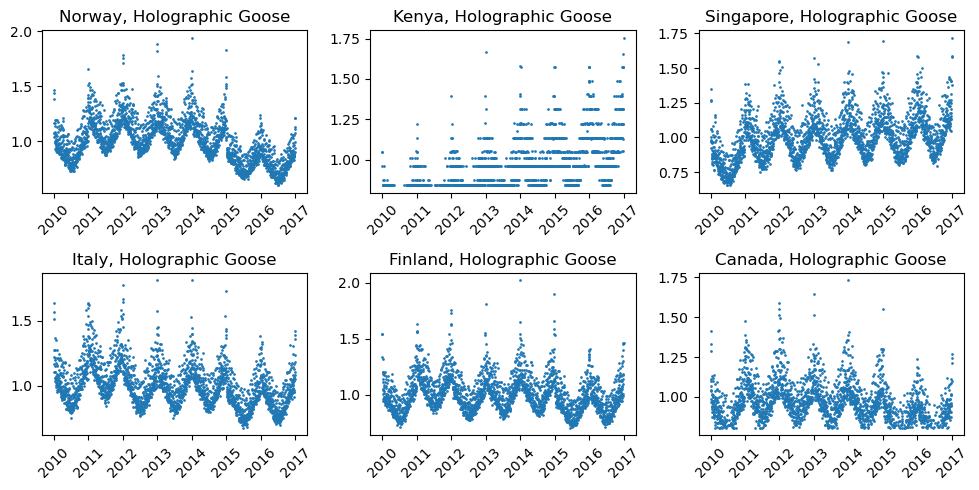

In [596]:
cols = [(c, "Holographic Goose") for c in countries]

plot_scatter_grid(av_over_stores, cols, "rescaled_sold", figsize=(10, 5), intensity = .9)


In [584]:
countries

array(['Norway', 'Kenya', 'Singapore', 'Italy', 'Finland', 'Canada'],
      dtype=object)

In [ ]:
def alg_predict(train_X, train_y, val, method):
    #train = np.array(train)
    if method == "LBG":
        model = LGBMRegressor(n_estimators = 3000)
    elif method == "XGB":
        model = XGBRegressor(objective = "reg:squarederror", n_estimators = 3000)

    model.fit(train_X, train_y)

    val = np.array(val).reshape(1,-1)
    pred = model.predict(val)
    return pred[0]